In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('D:\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [101]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.dtypes[df.dtypes == 'object']

sex       object
smoker    object
region    object
dtype: object

In [6]:
df.dtypes[df.dtypes == 'int64']

age         int64
children    int64
dtype: object

In [8]:
df.dtypes[df.dtypes == 'float64']

bmi        float64
charges    float64
dtype: object

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [79]:
df.sample(1).iloc[0]

age           44.00
sex            1.00
bmi           25.80
children       1.00
smoker         0.00
region         3.00
charges     7624.63
Name: 985, dtype: float64

In [ ]:
df['region'].name

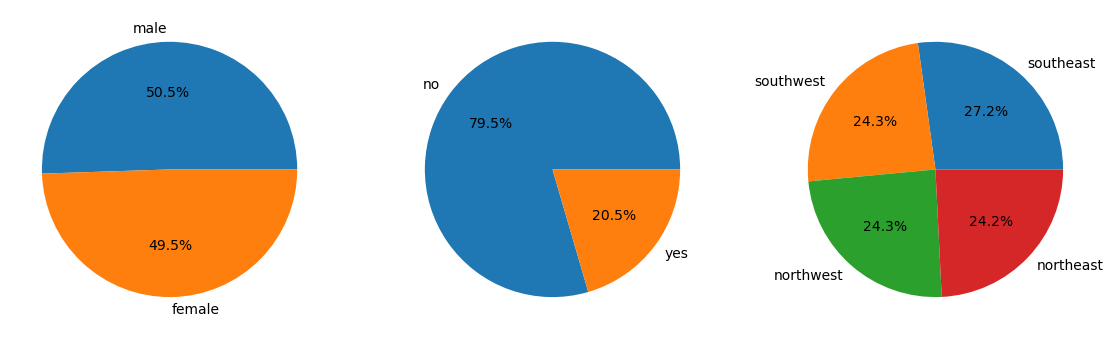

In [19]:
features = ['sex', 'smoker', 'region']
plt.figure(figsize=(14,8))
for i,col in enumerate(features):
    plt.subplot(1,3,i+1)
    x = df[col].value_counts()
    plt.plot(df[col].name)
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
plt.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


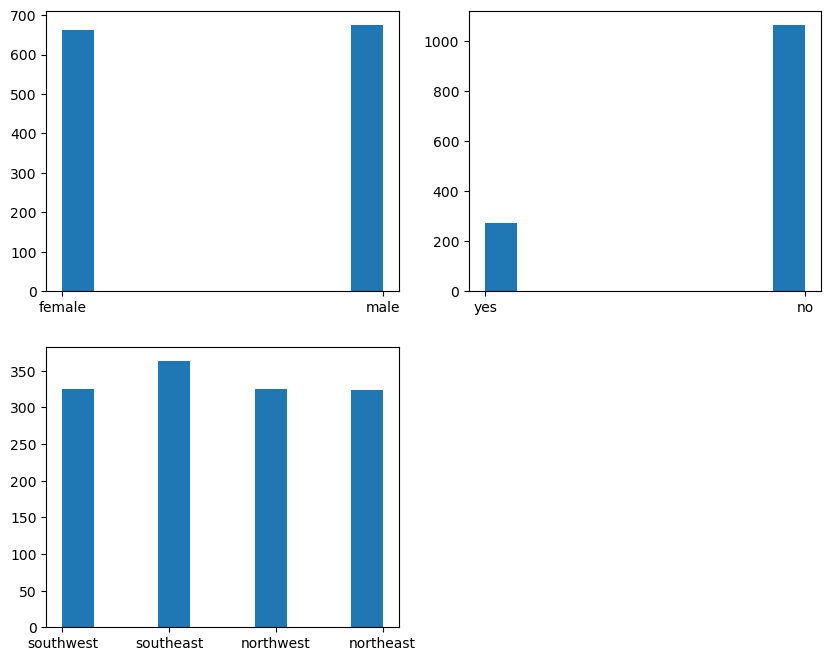

In [24]:
features = ['sex', 'smoker', 'region']
plt.figure(figsize=(10,8))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    plt.hist(df[col])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


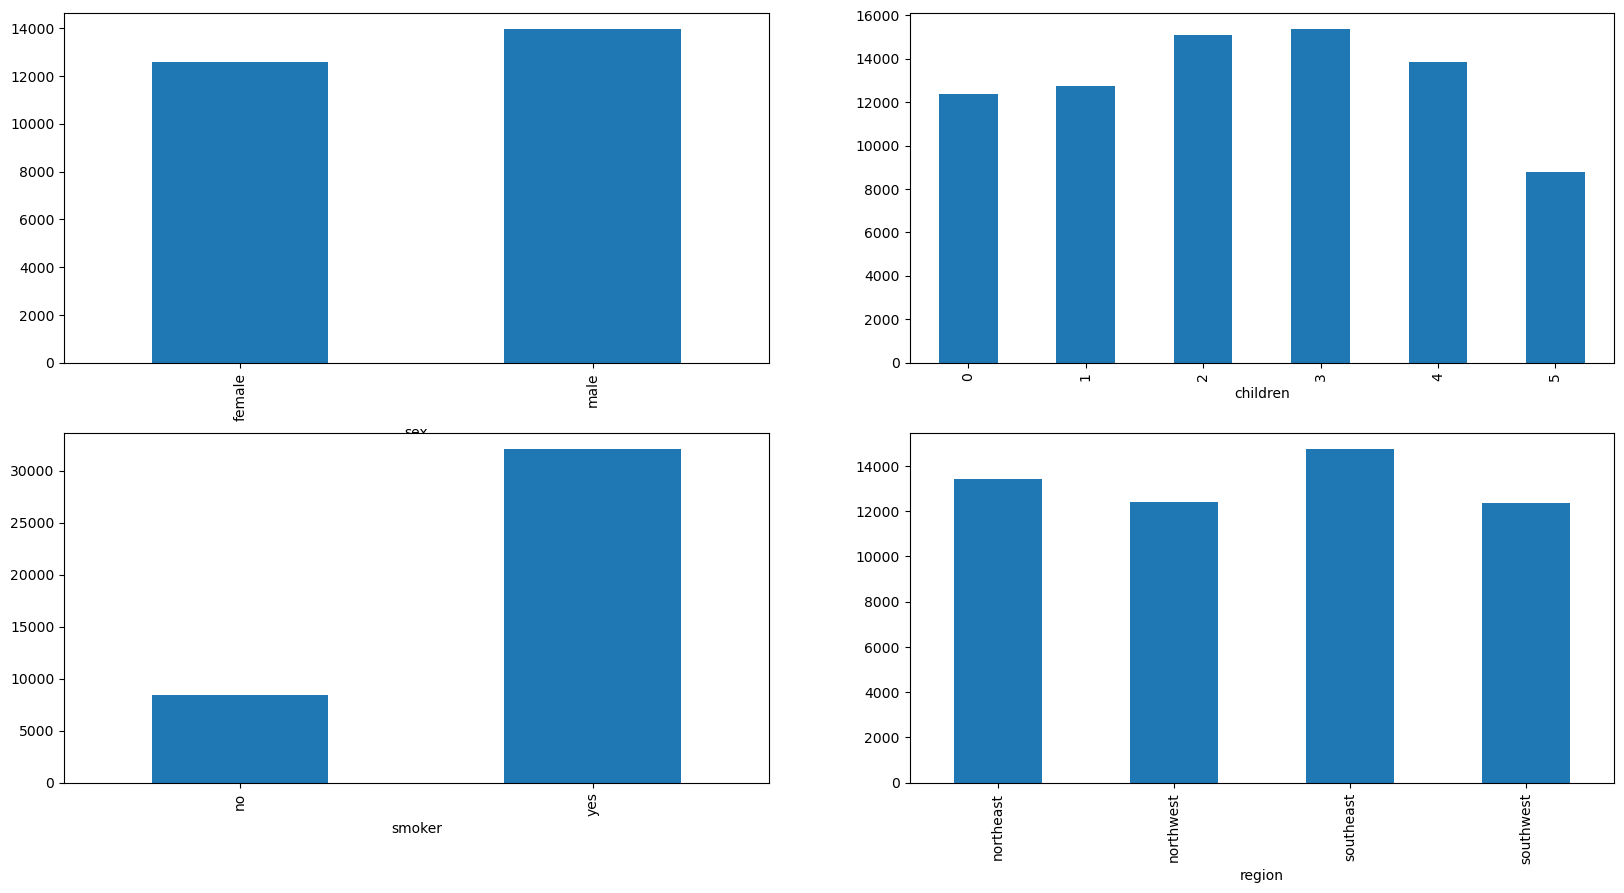

In [30]:
features = ['sex', 'children', 'smoker', 'region']
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

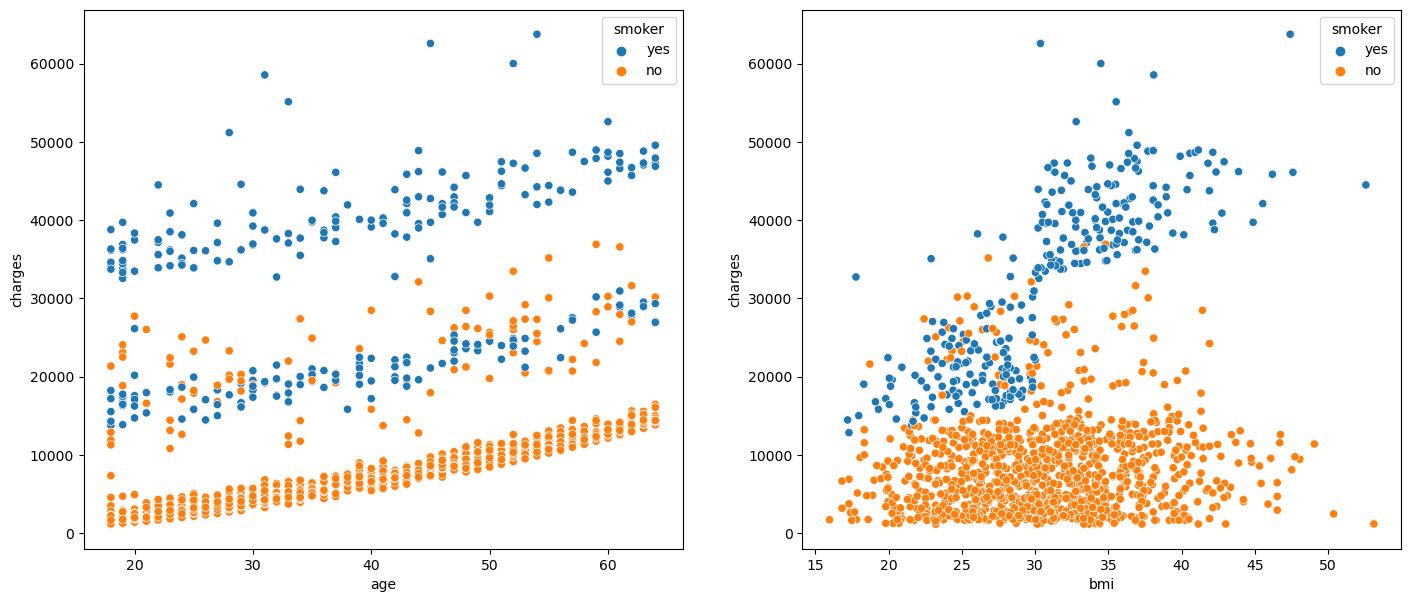

In [33]:
features = ['age','bmi']
plt.subplots(figsize=(17, 7))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data = df ,x =col,y = 'charges',hue = 'smoker')
    

In [35]:
df.duplicated().sum()

1

<Axes: >

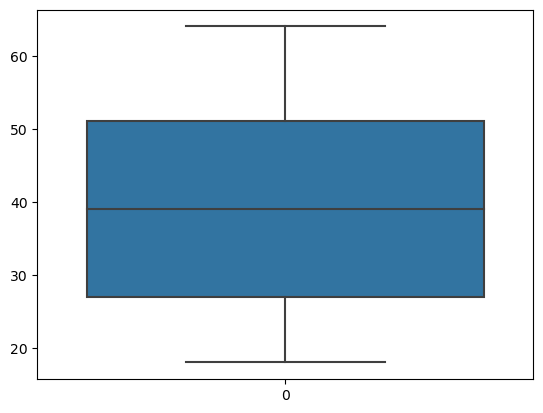

In [37]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: >

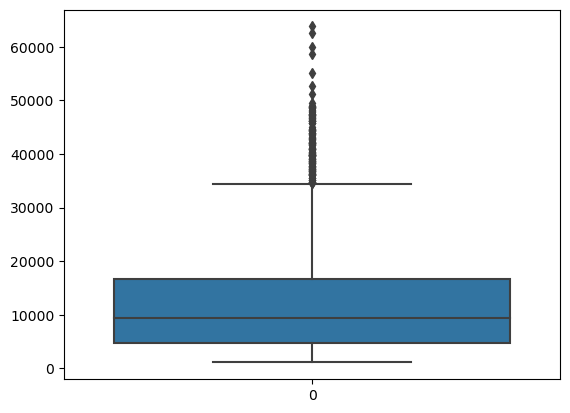

In [49]:
sns.boxplot(df['charges'])

<Axes: >

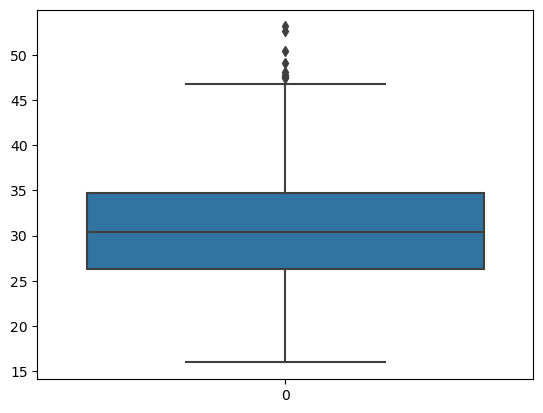

In [52]:
sns.boxplot(df['bmi'])

In [55]:
from feature_engine.outliers import ArbitraryOutlierCapper

In [56]:
ArbitraryOutlierCapper??

<Axes: >

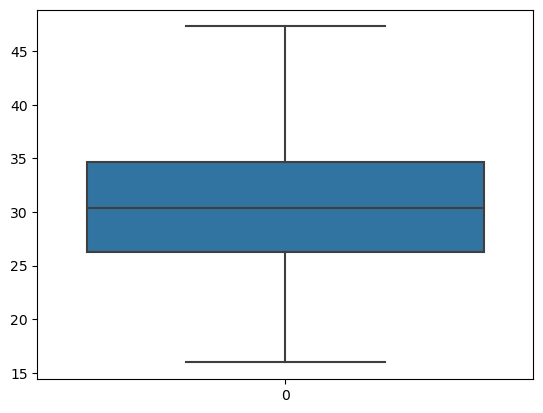

In [57]:
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

In [59]:
df['bmi'].skew()

0.23289153320569975

In [60]:
df['age'].skew()

0.054780773126998195

In [61]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [62]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [63]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [68]:
X = df.drop('charges',axis = 1)
Y = df['charges']

from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

l1=[]
l2=[]
l3=[]
cvs=0

for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs = (cross_val_score(lrmodel,X,Y,cv=5)).mean()
    l3.append(cvs)
    df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1

,train acc,test acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain,ytrain))
print(lrmodel.score(xtest,ytest))
print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7295415541376445
0.8062391115570589
0.7470697972809902


In [75]:
from sklearn.metrics import r2_score
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9954123497078247
0.8548937785039912
0.808125309217053
{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8693173313051628
0.9022460881213404
0.8607115291219747
